In [5]:
import pandas as pd

In [6]:
file_path = '/Users/harshitgupta/Desktop/vs /VS-Data-Den/data_cleaning/filled_model_dataset.csv'

In [7]:
df = pd.read_csv(file_path)

In [8]:
df['YEARWEEK'] = pd.to_datetime(df['YEARWEEK'])
df['week_of_year'] = df['YEARWEEK'].dt.isocalendar().week

In [9]:
df.head(10)

,PTNR_REGIONAL_MASTER_CD,YEARWEEK,TOTAL_SALES,flag,week_of_year
0,0.0,2019-12-08,28994.45,active,49
1,0.0,2019-12-15,127699.87,active,50
2,0.0,2019-12-22,102609.00,active,51
3,0.0,2019-12-29,NaN,inactive,52
4,0.0,2020-01-05,NaN,inactive,1
5,0.0,2020-01-12,NaN,inactive,2
6,0.0,2020-01-19,NaN,inactive,3
7,0.0,2020-01-26,NaN,inactive,4
8,0.0,2020-02-02,NaN,inactive,5
9,0.0,2020-02-09,NaN,inactive,6


In [10]:
df['TOTAL_SALES'].fillna(0, inplace=True)

/var/folders/_p/ljb0l43112vc95swz8nhgv340000gn/T/ipykernel_59003/2900868314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TOTAL_SALES'].fillna(0, inplace=True)


In [11]:
df.head(10)

,PTNR_REGIONAL_MASTER_CD,YEARWEEK,TOTAL_SALES,flag,week_of_year
0,0.0,2019-12-08,28994.45,active,49
1,0.0,2019-12-15,127699.87,active,50
2,0.0,2019-12-22,102609.00,active,51
3,0.0,2019-12-29,0.00,inactive,52
4,0.0,2020-01-05,0.00,inactive,1
5,0.0,2020-01-12,0.00,inactive,2
6,0.0,2020-01-19,0.00,inactive,3
7,0.0,2020-01-26,0.00,inactive,4
8,0.0,2020-02-02,0.00,inactive,5
9,0.0,2020-02-09,0.00,inactive,6


In [12]:
data = df

In [13]:
data['PTNR_REGIONAL_MASTER_CD'] = data['PTNR_REGIONAL_MASTER_CD'].astype('category')

In [14]:
data['YEARWEEK'] = pd.to_datetime(data['YEARWEEK'])
data['flag'] = data['flag'].map({'active': 1, 'inactive': 0})

In [15]:
data['month'] = data['YEARWEEK'].dt.month
data['day'] = data['YEARWEEK'].dt.day


In [16]:
X = data[['PTNR_REGIONAL_MASTER_CD', 'YEARWEEK', 'flag', 'week_of_year', 'month', 'day']]
y = data['TOTAL_SALES']


In [17]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [19]:
model = XGBRegressor(enable_categorical = True)

In [20]:
model.fit(X_train[['PTNR_REGIONAL_MASTER_CD', 'flag', 'week_of_year', 'month', 'day']], y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
y_pred = model.predict(X_test[['PTNR_REGIONAL_MASTER_CD', 'flag', 'week_of_year', 'month', 'day']])
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 10218002.95883504


/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
new_data = pd.DataFrame({
    'PTNR_REGIONAL_MASTER_CD': [0.0],
    'YEARWEEK': ['2024-04-24'],
    'flag': [1],
    'week_of_year': [17],
    'month': [4],
    'day': [24]
})

In [23]:
new_data['YEARWEEK'] = pd.to_datetime(new_data['YEARWEEK'])
prediction = model.predict(new_data[['PTNR_REGIONAL_MASTER_CD', 'flag', 'week_of_year', 'month', 'day']])
print("Predicted Sales:", prediction[0])

Predicted Sales: 7900900.5


In [24]:
results = pd.DataFrame({'Actual_Sales': y_test, 'Predicted_Sales': y_pred})
results['PTNR_REGIONAL_MASTER_CD'] = X_test['PTNR_REGIONAL_MASTER_CD'].reset_index(drop=True)


In [25]:
import matplotlib.pyplot as plt

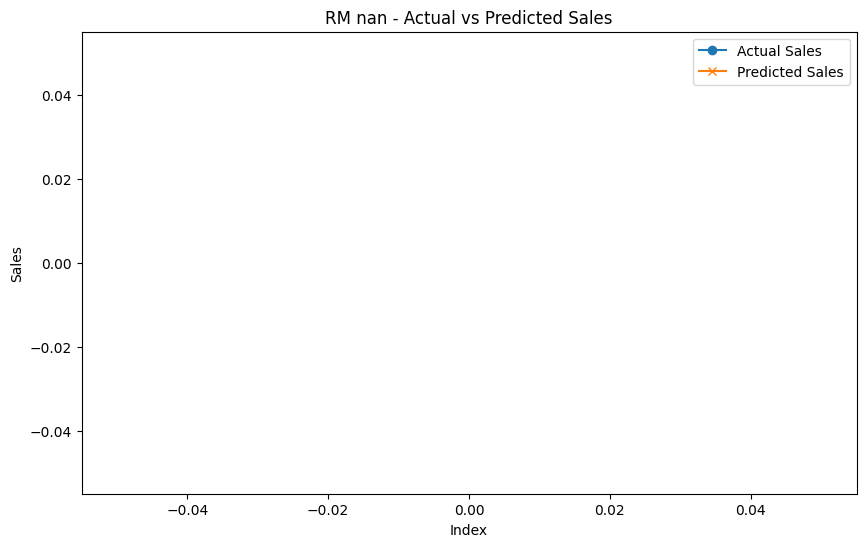

In [26]:
unique_rms = results['PTNR_REGIONAL_MASTER_CD'].unique()
for rm in unique_rms:
    rm_data = results[results['PTNR_REGIONAL_MASTER_CD'] == rm]
    plt.figure(figsize=(10, 6))
    plt.plot(rm_data.index, rm_data['Actual_Sales'], label='Actual Sales', marker='o')
    plt.plot(rm_data.index, rm_data['Predicted_Sales'], label='Predicted Sales', marker='x')
    plt.title(f'RM {rm} - Actual vs Predicted Sales')
    plt.xlabel('Index')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()